<a href="https://colab.research.google.com/github/HenriqueCF8896/MNCM/blob/main/Programa6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Método da Busca Aleatória ---
Ajustando num_points para 49 para uma malha quadrada.
Ajustando num_points para 196 para uma malha quadrada.
Ajustando num_points para 324 para uma malha quadrada.
Ajustando num_points para 484 para uma malha quadrada.
Ajustando num_points para 676 para uma malha quadrada.
Ajustando num_points para 961 para uma malha quadrada.

--- Resultados da Busca Aleatória ---
| Pontos | Tipo       | Ponto Crítico (x, y) | Valor f(x,y) | Tempo (s) | Erro Relativo (f) |
|--------|------------|----------------------|--------------|-----------|-------------------|
| 50     | Regular    | (1.0000, 1.0000) | 4.0000     | 0.000683 | N/A               |
|        | Randômica  | (0.1931, 0.2897) | 1.2466     | 0.018888 | N/A               |
| 200    | Regular    | (1.1538, 0.6923) | 3.9461     | 0.001297 | 0.0135            |
|        | Randômica  | (1.2108, 0.5751) | 3.5616     | 0.003253 | 1.8570            |
| 350    | Regular    | (0.8824, 0.5294) | 4.2479     | 0.0028

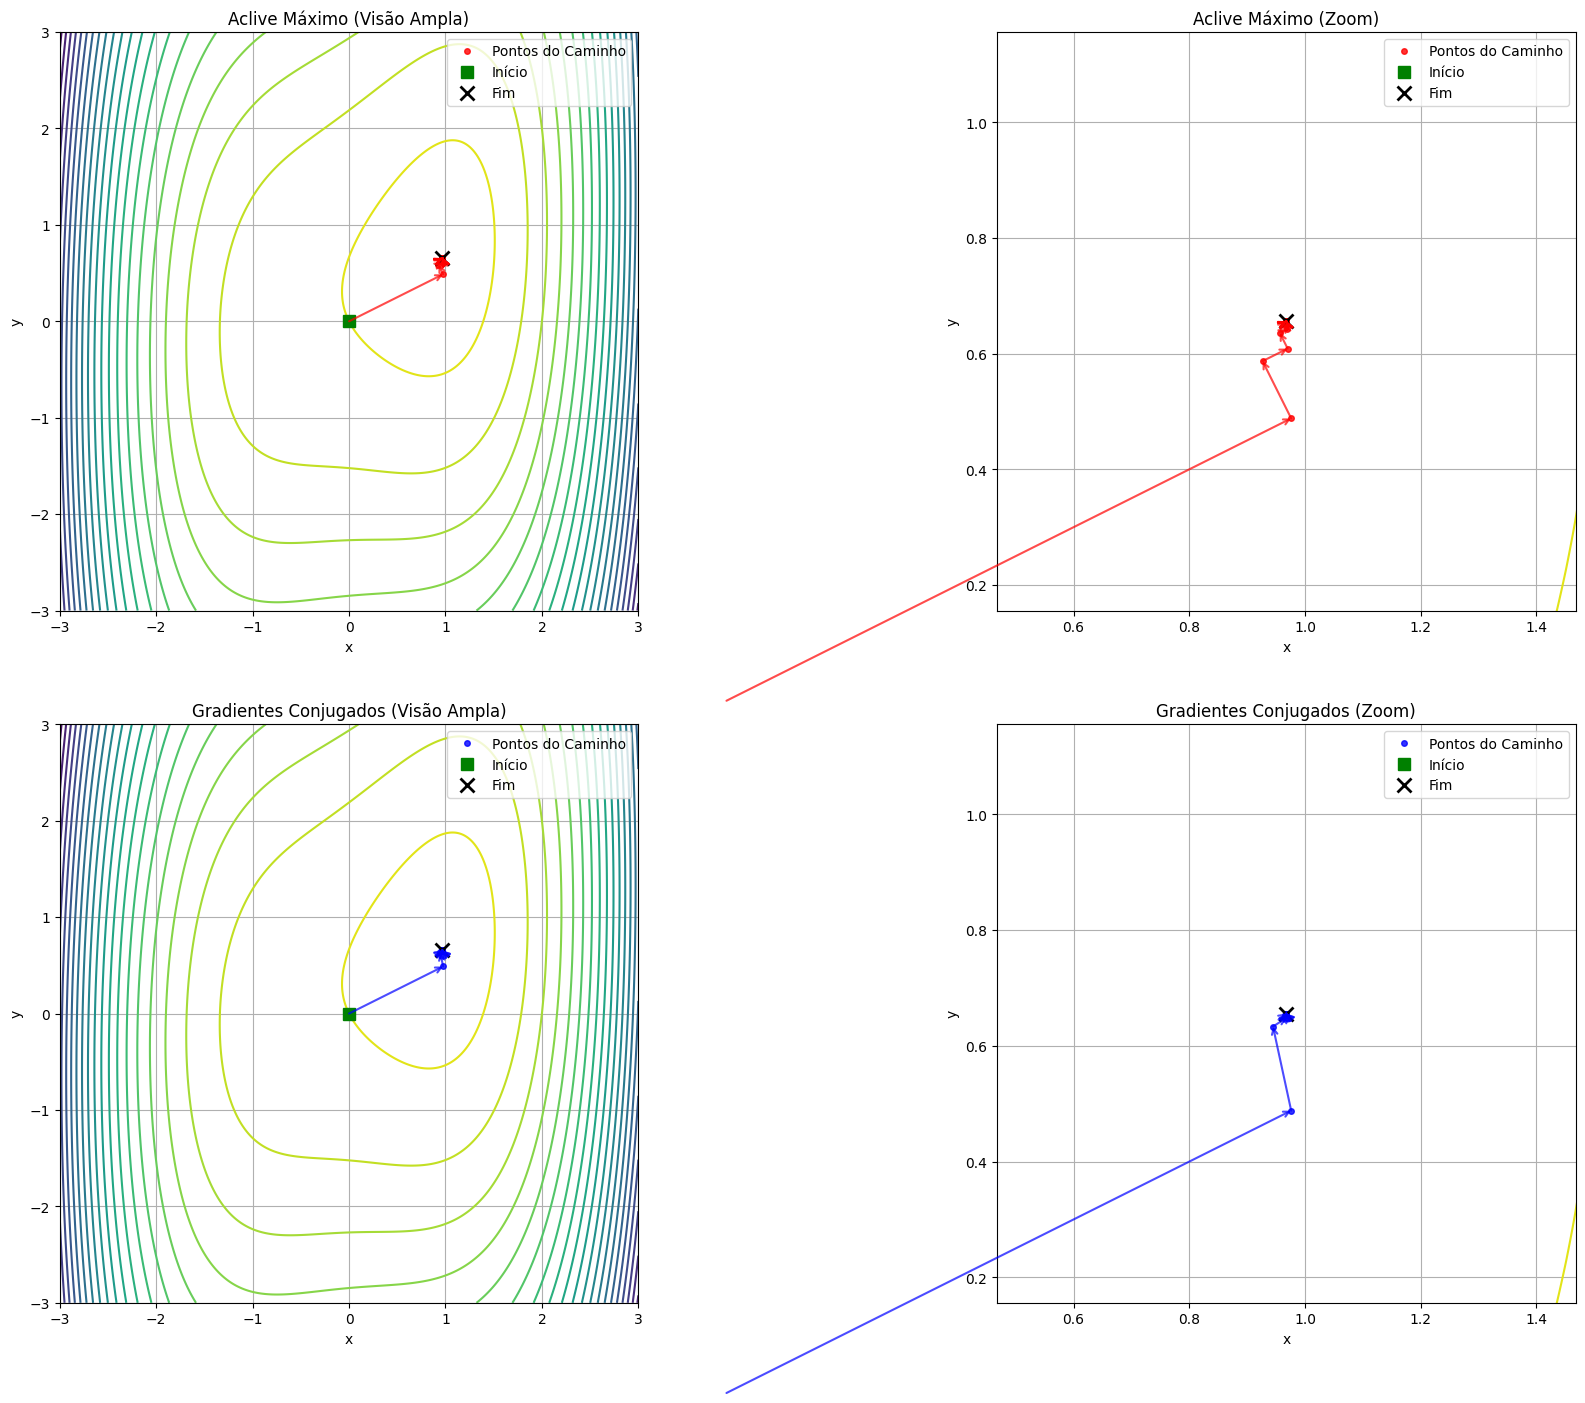


--- Análise Visual dos Caminhos de Busca ---
Observe os gráficos gerados:
Aclive Máximo: Nas visualizações com zoom, a ortogonalidade dos passos (setas vermelhas) fica muito mais evidente, mostrando o padrão de 'zigue-zague' ao se aproximar do ótimo.
Gradientes Conjugados: Nas visualizações com zoom, o caminho mais direto e suave (setas azuis) em direção ao ótimo é claramente visível, confirmando que o padrão de 'zigue-zague' é minimizado.

Passos (Aclive Máximo): 25
Passos (Gradientes Conjugados): 12
O método dos gradientes conjugados geralmente converge em menos passos, sendo mais eficiente.

--- Análise Gráfica da Natureza do Ponto Crítico ---
Compare a classificação da Hessiana (Mínimo/Máximo/Sela) com o aspecto visual das curvas de nível no ponto final. Nos gráficos com zoom, a topologia ao redor do ponto crítico (Máximo Local neste caso) deve ser mais nítida.
Classificação da Hessiana: Máximo Local.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

# 1. Definição da Função Objetivo e suas Derivadas
# -----------------------------------------------------------------------------
def f(x_vec):
    """Função objetivo a ser maximizada."""
    x, y = x_vec
    return 4*x + 2*y + x**2 - 2*x**4 + 2*x*y - 3*y**2

def gradient_f(x_vec):
    """Calcula o vetor gradiente da função objetivo."""
    x, y = x_vec
    df_dx = 4 + 2*x - 8*x**3 + 2*y
    df_dy = 2 + 2*x - 6*y
    return np.array([df_dx, df_dy])

def hessian_f(x_vec):
    """Calcula a matriz Hessiana da função objetivo."""
    x, y = x_vec
    d2f_dx2 = 2 - 24*x**2
    d2f_dy2 = -6
    d2f_dxdy = 2
    return np.array([[d2f_dx2, d2f_dxdy],
                     [d2f_dxdy, d2f_dy2]])

# -----------------------------------------------------------------------------
# 2. Implementação dos Métodos de Otimização
# -----------------------------------------------------------------------------

# --- Método da Busca Aleatória ---
def random_search(num_points, domain_min, domain_max, is_grid=True):
    """
    Implementa a busca aleatória (grid ou randômica) para encontrar o ponto ótimo.
    """
    best_x = None
    best_f_val = -np.inf # Inicializa para maximização.

    if is_grid:
        num_per_dim = int(np.sqrt(num_points))
        if num_per_dim * num_per_dim != num_points:
            print(f"Ajustando num_points para {num_per_dim**2} para uma malha quadrada.")
            num_points = num_per_dim**2
        x_coords = np.linspace(domain_min, domain_max, num_per_dim)
        y_coords = np.linspace(domain_min, domain_max, num_per_dim)
        for x in x_coords:
            for y in y_coords:
                current_f_val = f(np.array([x, y]))
                if current_f_val > best_f_val:
                    best_f_val = current_f_val
                    best_x = np.array([x, y])
    else:
        for _ in range(num_points):
            x = np.random.uniform(domain_min, domain_max)
            y = np.random.uniform(domain_min, domain_max)
            current_f_val = f(np.array([x, y]))
            if current_f_val > best_f_val:
                best_f_val = current_f_val
                best_x = np.array([x, y])
    return best_x, best_f_val

# --- Implementação do Golden Section Search para Otimização de Linha --------
# Referência: O método da Razão Áurea é apresentado na Seção 5 do documento.
def golden_section_search(func_1d, a, b, tol=1e-6, max_iter=1000):
    """
    Realiza a busca da seção áurea para encontrar o máximo de uma função unimodal func_1d
    no intervalo [a, b].
    func_1d: A função univariada a ser maximizada.
    a, b: Limites inferior e superior do intervalo de busca.
    tol: Tolerância para a largura do intervalo.
    max_iter: Número máximo de iterações.
    """
    phi = (1 + np.sqrt(5)) / 2  # Razão áurea
    resphi = 2 - phi # 1/phi (para o método)

    # Pontos iniciais no intervalo [a, b]
    x1 = a + resphi * (b - a)
    x2 = b - resphi * (b - a)

    # Avalia a função nos pontos x1 e x2 (lembre-se que estamos maximizando)
    f_x1 = func_1d(x1)
    f_x2 = func_1d(x2)

    for i in range(max_iter):
        if abs(b - a) < tol: # Critério de parada: intervalo suficientemente pequeno
            break

        if f_x1 > f_x2: # Se f(x1) é maior, o máximo está no intervalo [a, x2]
            b = x2
            x2 = x1
            f_x2 = f_x1
            x1 = a + resphi * (b - a)
            f_x1 = func_1d(x1)
        else: # Se f(x2) é maior, o máximo está no intervalo [x1, b]
            a = x1
            x1 = x2
            f_x1 = f_x2
            x2 = b - resphi * (b - a)
            f_x2 = func_1d(x2)

    # O ponto médio do intervalo final é a melhor estimativa do máximo
    return (a + b) / 2

# --- Método do Aclive Máximo (Ascensão de Colina) ---
def steepest_ascent(initial_point, max_iterations=1000, tolerance=1e-6):
    """
    Implementa o método do aclive máximo para maximização.
    Usa Golden Section Search para a otimização de linha.
    """
    path = [initial_point]
    current_x = np.array(initial_point, dtype=float)
    num_steps = 0


    alpha_interval = [-0.1, 1.0] # Um intervalo que se espera conter o alpha ótimo.

    for i in range(max_iterations):
        grad = gradient_f(current_x)
        if np.linalg.norm(grad) < tolerance:
            break

        # Define a função de linha g(alpha) = f(current_x + alpha * grad)
        line_search_func = lambda alpha: f(current_x + alpha * grad)

        # Encontra o alpha ótimo usando Golden Section Search
        alpha_k = golden_section_search(line_search_func, alpha_interval[0], alpha_interval[1])

        current_x = current_x + alpha_k * grad
        path.append(current_x.copy())
        num_steps += 1
    return np.array(path), num_steps

# --- Método dos Gradientes Conjugados (Fletcher-Reeves) ---
def conjugate_gradient_fletcher_reeves(initial_point, max_iterations=1000, tolerance=1e-6):
    """
    Implementa o método dos gradientes conjugados (Fletcher-Reeves) para maximização.
    Usa Golden Section Search para a otimização de linha.
    """
    path = [initial_point]
    current_x = np.array(initial_point, dtype=float)
    num_steps = 0

    grad_k = gradient_f(current_x)
    direction_k = grad_k

    alpha_interval = [-0.1, 1.0] # Intervalo para busca de linha

    for i in range(max_iterations):
        if np.linalg.norm(grad_k) < tolerance:
            break

        # Define a função de linha g(alpha) = f(current_x + alpha * direction_k)
        line_search_func = lambda alpha: f(current_x + alpha * direction_k)

        # Encontra o alpha ótimo usando Golden Section Search
        alpha_k = golden_section_search(line_search_func, alpha_interval[0], alpha_interval[1])

        current_x_plus_1 = current_x + alpha_k * direction_k
        grad_k_plus_1 = gradient_f(current_x_plus_1)

        denominator = np.dot(grad_k, grad_k)
        beta_k = np.dot(grad_k_plus_1, grad_k_plus_1) / denominator if denominator > 1e-10 else 0

        direction_k = grad_k_plus_1 + beta_k * direction_k

        current_x = current_x_plus_1
        grad_k = grad_k_plus_1
        path.append(current_x.copy())
        num_steps += 1
    return np.array(path), num_steps

# -----------------------------------------------------------------------------
# 3. Execução e Análise
# -----------------------------------------------------------------------------

# --- Análise do Método da Busca Aleatória ---
print("--- Método da Busca Aleatória ---")
num_points_variations = [50, 200, 350, 500, 700, 1000]
domain_min, domain_max = -3, 3
results_random_search = []

prev_best_f_val_grid = None
prev_best_f_val_random = None

for np_val in num_points_variations:
    start_time = time.time()
    best_x_grid, best_f_grid = random_search(np_val, domain_min, domain_max, is_grid=True)
    time_grid = time.time() - start_time

    start_time = time.time()
    best_x_random, best_f_random = random_search(np_val, domain_min, domain_max, is_grid=False)
    time_random = time.time() - start_time

    error_relative_grid = "N/A"
    if prev_best_f_val_grid is not None:
        error_relative_grid = abs(best_f_grid - prev_best_f_val_grid) / abs(prev_best_f_val_grid) if abs(prev_best_f_val_grid) > 1e-10 else "Inf"

    error_relative_random = "N/A"
    if prev_best_f_val_random is not None:
        error_relative_random = abs(best_f_random - prev_best_f_val_random) / abs(prev_best_f_val_random) if abs(prev_best_f_val_random) > 1e-10 else "Inf"

    results_random_search.append({
        "num_points": np_val,
        "grid_x": best_x_grid,
        "grid_f": best_f_grid,
        "grid_time": time_grid,
        "grid_error_relative": error_relative_grid,
        "random_x": best_x_random,
        "random_f": best_f_random,
        "random_time": time_random,
        "random_error_relative": error_relative_random,
    })
    prev_best_f_val_grid = best_f_grid
    prev_best_f_val_random = best_f_random

print("\n--- Resultados da Busca Aleatória ---")
print("| Pontos | Tipo       | Ponto Crítico (x, y) | Valor f(x,y) | Tempo (s) | Erro Relativo (f) |")
print("|--------|------------|----------------------|--------------|-----------|-------------------|")
for res in results_random_search:
    grid_error_display = res['grid_error_relative']
    if not isinstance(grid_error_display, str):
        grid_error_display = f'{grid_error_display:.4f}'
    print(f"| {res['num_points']:<6} | Regular    | ({res['grid_x'][0]:.4f}, {res['grid_x'][1]:.4f}) | {res['grid_f']:.4f}     | {res['grid_time']:.6f} | {grid_error_display:<17} |")

    random_error_display = res['random_error_relative']
    if not isinstance(random_error_display, str):
        random_error_display = f'{random_error_display:.4f}'
    print(f"|        | Randômica  | ({res['random_x'][0]:.4f}, {res['random_x'][1]:.4f}) | {res['random_f']:.4f}     | {res['random_time']:.6f} | {random_error_display:<17} |")
print("\nNota: Erro Relativo (f) é a diferença no valor da função objetivo em relação ao passo anterior.")


# --- Análise dos Métodos Gradientes ---
print("\n--- Métodos Gradientes ---")
initial_point = np.array([0.0, 0.0])

# Aclive Máximo
print("\nExecutando Método do Aclive Máximo...")
start_time = time.time()
path_steepest_ascent, steps_steepest_ascent = steepest_ascent(initial_point)
time_steepest_ascent = time.time() - start_time
final_point_steepest_ascent = path_steepest_ascent[-1]
final_f_steepest_ascent = f(final_point_steepest_ascent)
print(f"Aclive Máximo - Ponto Final: [{final_point_steepest_ascent[0]:.4f}, {final_point_steepest_ascent[1]:.4f}], Valor f: {final_f_steepest_ascent:.4f}, Passos: {steps_steepest_ascent}, Tempo: {time_steepest_ascent:.6f}s")

# Gradientes Conjugados
print("\nExecutando Método dos Gradientes Conjugados (Fletcher-Reeves)...")
start_time = time.time()
path_conjugate_gradient, steps_conjugate_gradient = conjugate_gradient_fletcher_reeves(initial_point)
time_conjugate_gradient = time.time() - start_time
final_point_conjugate_gradient = path_conjugate_gradient[-1]
final_f_conjugate_gradient = f(final_point_conjugate_gradient)
print(f"Gradientes Conjugados - Ponto Final: [{final_point_conjugate_gradient[0]:.4f}, {final_point_conjugate_gradient[1]:.4f}], Valor f: {final_f_conjugate_gradient:.4f}, Passos: {steps_conjugate_gradient}, Tempo: {time_conjugate_gradient:.6f}s")


# --- Determinação da Natureza do Ponto Crítico ---
print("\n--- Análise da Natureza do Ponto Crítico ---")
optimal_point = final_point_conjugate_gradient
H_at_optimal = hessian_f(optimal_point)

eigenvalues = np.linalg.eigvals(H_at_optimal)
print(f"Ponto Crítico Analisado: ({optimal_point[0]:.4f}, {optimal_point[1]:.4f})")
print(f"Matriz Hessiana no ponto: \n{H_at_optimal}")
print(f"Autovalores da Hessiana: {eigenvalues}")

if np.all(eigenvalues > 0):
    nature = "Mínimo Local"
elif np.all(eigenvalues < 0):
    nature = "Máximo Local"
elif np.any(eigenvalues > 0) and np.any(eigenvalues < 0):
    nature = "Ponto de Sela"
elif np.any(eigenvalues == 0):
    nature = "Teste Inconclusivo (Algum autovalor é nulo)"
else:
    nature = "Não Classificado"
print(f"Natureza do Ponto Crítico: {nature}")

# --- Visualização dos Caminhos de Busca ---
print("\n--- Gerando Gráficos dos Caminhos de Busca ---")
x = np.linspace(domain_min, domain_max, 400)
y = np.linspace(domain_min, domain_max, 400)
X, Y = np.meshgrid(x, y)
Z = f([X, Y])

plt.figure(figsize=(18, 14)) # Aumenta a figura para acomodar 4 subplots

# --- Função auxiliar para plotagem ---
def plot_optimization_path(ax, path, X_grid, Y_grid, Z_grid, title, line_color, zoom_enabled=False, optimal_pt=None, full_domain=None):
    ax.contour(X_grid, Y_grid, Z_grid, levels=20, cmap='viridis')

    for i in range(len(path) - 1):
        ax.annotate('', xy=path[i+1], xytext=path[i],
                    arrowprops=dict(facecolor=line_color, edgecolor=line_color, arrowstyle='->',
                                    linewidth=1.5, shrinkA=0, shrinkB=0, alpha=0.7))
    ax.plot(path[:, 0], path[:, 1], 'o', markersize=4, color=line_color, label='Pontos do Caminho', alpha=0.8)
    ax.plot(path[0, 0], path[0, 1], 'gs', markersize=8, label='Início')
    ax.plot(path[-1, 0], path[-1, 1], 'kx', markersize=10, mew=2, label='Fim')

    ax.set_title(title)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend()
    ax.grid(True)
    ax.set_aspect('equal', adjustable='box')

    if zoom_enabled and optimal_pt is not None:
        zoom_margin = 0.5 # Margem para o zoom
        x_center, y_center = optimal_pt[0], optimal_pt[1]
        ax.set_xlim(x_center - zoom_margin, x_center + zoom_margin)
        ax.set_ylim(y_center - zoom_margin, y_center + zoom_margin)
    elif full_domain is not None:
        ax.set_xlim(full_domain[0], full_domain[1])
        ax.set_ylim(full_domain[0], full_domain[1])


# Definindo a margem para o zoom
plot_domain = [-3, 3] # Domínio completo para a visualização ampla

# --- 1. Aclive Máximo (Visão Ampla) ---
ax1 = plt.subplot(2, 2, 1)
plot_optimization_path(ax1, path_steepest_ascent, X, Y, Z,
                       'Aclive Máximo (Visão Ampla)', 'red',
                       zoom_enabled=False, full_domain=plot_domain)

# --- 2. Aclive Máximo (Visão Zoom) ---
ax2 = plt.subplot(2, 2, 2)
plot_optimization_path(ax2, path_steepest_ascent, X, Y, Z,
                       'Aclive Máximo (Zoom)', 'red',
                       zoom_enabled=True, optimal_pt=optimal_point, full_domain=plot_domain)

# --- 3. Gradientes Conjugados (Visão Ampla) ---
ax3 = plt.subplot(2, 2, 3)
plot_optimization_path(ax3, path_conjugate_gradient, X, Y, Z,
                       'Gradientes Conjugados (Visão Ampla)', 'blue',
                       zoom_enabled=False, full_domain=plot_domain)

# --- 4. Gradientes Conjugados (Visão Zoom) ---
ax4 = plt.subplot(2, 2, 4)
plot_optimization_path(ax4, path_conjugate_gradient, X, Y, Z,
                       'Gradientes Conjugados (Zoom)', 'blue',
                       zoom_enabled=True, optimal_pt=optimal_point, full_domain=plot_domain)


plt.tight_layout()
plt.show()

# --- Análise Visual dos Caminhos de Busca ---
print("\n--- Análise Visual dos Caminhos de Busca ---")
print("Observe os gráficos gerados:")
print("Aclive Máximo: Nas visualizações com zoom, a ortogonalidade dos passos (setas vermelhas) fica muito mais evidente, mostrando o padrão de 'zigue-zague' ao se aproximar do ótimo.")
print("Gradientes Conjugados: Nas visualizações com zoom, o caminho mais direto e suave (setas azuis) em direção ao ótimo é claramente visível, confirmando que o padrão de 'zigue-zague' é minimizado.")
print(f"\nPassos (Aclive Máximo): {steps_steepest_ascent}")
print(f"Passos (Gradientes Conjugados): {steps_conjugate_gradient}")
print("O método dos gradientes conjugados geralmente converge em menos passos, sendo mais eficiente.")

# --- Análise Gráfica da Natureza do Ponto Crítico ---
print("\n--- Análise Gráfica da Natureza do Ponto Crítico ---")
print("Compare a classificação da Hessiana (Mínimo/Máximo/Sela) com o aspecto visual das curvas de nível no ponto final. Nos gráficos com zoom, a topologia ao redor do ponto crítico (Máximo Local neste caso) deve ser mais nítida.")
print(f"Classificação da Hessiana: {nature}.")